In [1]:
import torch
import numpy as np
from torch.utils import data
from matplotlib import pyplot as plt

In [2]:
#训练集7000，测试集3000（加起来为数据集大小10000）
n_train, n_test  = 7000, 3000

#定义模型参数
num_inputs = 500

#高维线性函数：y = 0.028+Σ0.0056x+ϵ   true_w[500,1]
true_w, true_b = torch.ones(num_inputs,1)*0.0056, 0.028

features = torch.randn((n_train+n_test),num_inputs)
labels = torch.matmul(features, true_w) + true_b  #y = 0.028+Σ0.0056x  [7000,500]*[500,1]=[7000,1]
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),dtype=torch.float) #加上噪声项ϵ

#分出训练集样本、测试集样本、训练集标签、测试集标签
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train, :], labels[n_train:, :]

print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

torch.Size([7000, 500])
torch.Size([3000, 500])
torch.Size([7000, 1])
torch.Size([3000, 1])


In [3]:
#定义随机初始化模型参数的函数
w = torch.randn((num_inputs,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
params = [w, b]

#因为是线性函数，所以不用加激活函数
#def relu(X):
#    return torch.max(input=X, other=torch.tensor(0.0))

#定义回归模型
def net(X,w,b):
    return torch.mm(X,w) + b

#定义均方误差（回归函数损失函数可使用均方误差）
def squared_loss(y_hat,y):
    return ((y_hat-y.view(y_hat.size())) ** 2) / 2

#定义随机梯度下降函数
def SGD(params, lr):
    for param in params:
        param.data -= lr * param.grad

In [4]:
#定义训练参数
batch_size, num_epochs, lr = 128, 100, 0.003

#划分数据集
dataset = torch.utils.data.TensorDataset(train_features,train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

#训练模型
loss_train = []
loss_test = []
for epoch in range(num_epochs):
    for X, y in train_iter:
        y_hat = net(X,w,b)
        loss = squared_loss(y_hat,y).sum() 
        loss.backward()       #计算损失     
        SGD(params, lr)    #更新梯度
        w.grad.data.zero_()
        b.grad.data.zero_()
    loss_train.append(squared_loss(net(train_features,w,b),train_labels).mean().item()) #训练集损失
    loss_test.append(squared_loss(net(test_features,w,b),test_labels).mean().item())    #测试集损失
    print('epoch %d, loss_train %f, loss_test %f '% (epoch+1, loss_train[epoch], loss_test[epoch]))

epoch 1, loss_train 19.599493, loss_test 19.569647 
epoch 2, loss_train 2.998299, loss_test 3.005795 
epoch 3, loss_train 0.211285, loss_test 0.214297 
epoch 4, loss_train 0.026659, loss_test 0.026628 
epoch 5, loss_train 0.003233, loss_test 0.003090 
epoch 6, loss_train 0.000935, loss_test 0.000943 
epoch 7, loss_train 0.000698, loss_test 0.000718 
epoch 8, loss_train 0.000855, loss_test 0.000838 
epoch 9, loss_train 0.000547, loss_test 0.000533 
epoch 10, loss_train 0.000770, loss_test 0.000763 
epoch 11, loss_train 0.001014, loss_test 0.001042 
epoch 12, loss_train 0.000675, loss_test 0.000662 
epoch 13, loss_train 0.000723, loss_test 0.000686 
epoch 14, loss_train 0.000734, loss_test 0.000722 
epoch 15, loss_train 0.000739, loss_test 0.000723 
epoch 16, loss_train 0.000551, loss_test 0.000560 
epoch 17, loss_train 0.000729, loss_test 0.000687 
epoch 18, loss_train 0.000587, loss_test 0.000608 
epoch 19, loss_train 0.000911, loss_test 0.000929 
epoch 20, loss_train 0.000692, loss_te

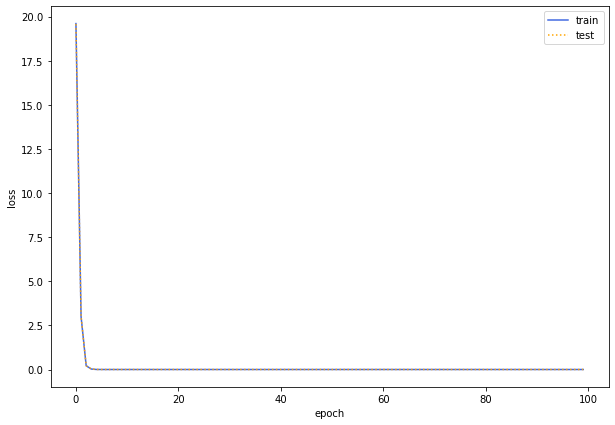

In [7]:
plt.figure(figsize=(10,7))
plt.plot(loss_train,label='train',color='royalblue')
plt.plot(loss_test,label='test',linestyle=':', color='orange')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [12]:
print(w.mean())
print(b)

tensor(0.0056, grad_fn=<MeanBackward0>)
tensor([0.0284], requires_grad=True)
